In [81]:
# https://github.com/LastAncientOne/Stock_Analysis_For_Quant/blob/master/Python_Stock/Portfolio_Strategies/Risk_Returns_Portfolio.ipynb
# https://www.learnpythonwithrune.org/python-for-finance-risk-and-return/#lesson-1
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import talib as ta
import numpy as np 
from talib import abstract
import pandas_datareader.data as web
from pandas_datareader import data,wb
import yfinance as yf
import mplfinance as fplt
import datetime as dt
from datetime import date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns 
import math
import plotly.graph_objects as go
import plotly.express as px

In [82]:
#stock=input("Enter a stock ticker symbol: ")
stock = ['TD','JPM','UBS','PNC','C','FRC']

In [83]:
# 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
# Retrieve stock data frame (df) from yfinance API at an interval of 1m 
df = yf.download(tickers=stock,period='y',interval='15m')
df2 = pd.DataFrame(df)
df2 = df2.to_csv('portfolio.csv')
df2 = pd.read_csv('portfolio.csv')
#df2 = df2.to_csv(f'{stock}.csv')
#df2 = pd.read_csv(f'{stock}.csv')

[*********************100%***********************]  6 of 6 completed


In [84]:
df = pd.DataFrame()
start = '2020-04-27'
end = date.today()

for s in stock:
    df[s]=yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [85]:
df.head()

,TD,JPM,UBS,PNC,C,FRC
Date,,,,,,
2020-04-27,35.646049,86.477211,8.513748,95.223969,41.615971,102.734077
2020-04-28,36.510082,87.089531,8.992538,95.675308,42.196949,103.273705
2020-04-29,38.308701,89.438362,9.567085,100.188721,44.923080,105.013596
2020-04-30,36.827484,87.519096,9.366865,96.289139,43.403599,102.516792
2020-05-01,35.760662,85.225098,9.044770,92.949203,41.118248,98.879692


In [86]:
stock_rets = df.pct_change().dropna()

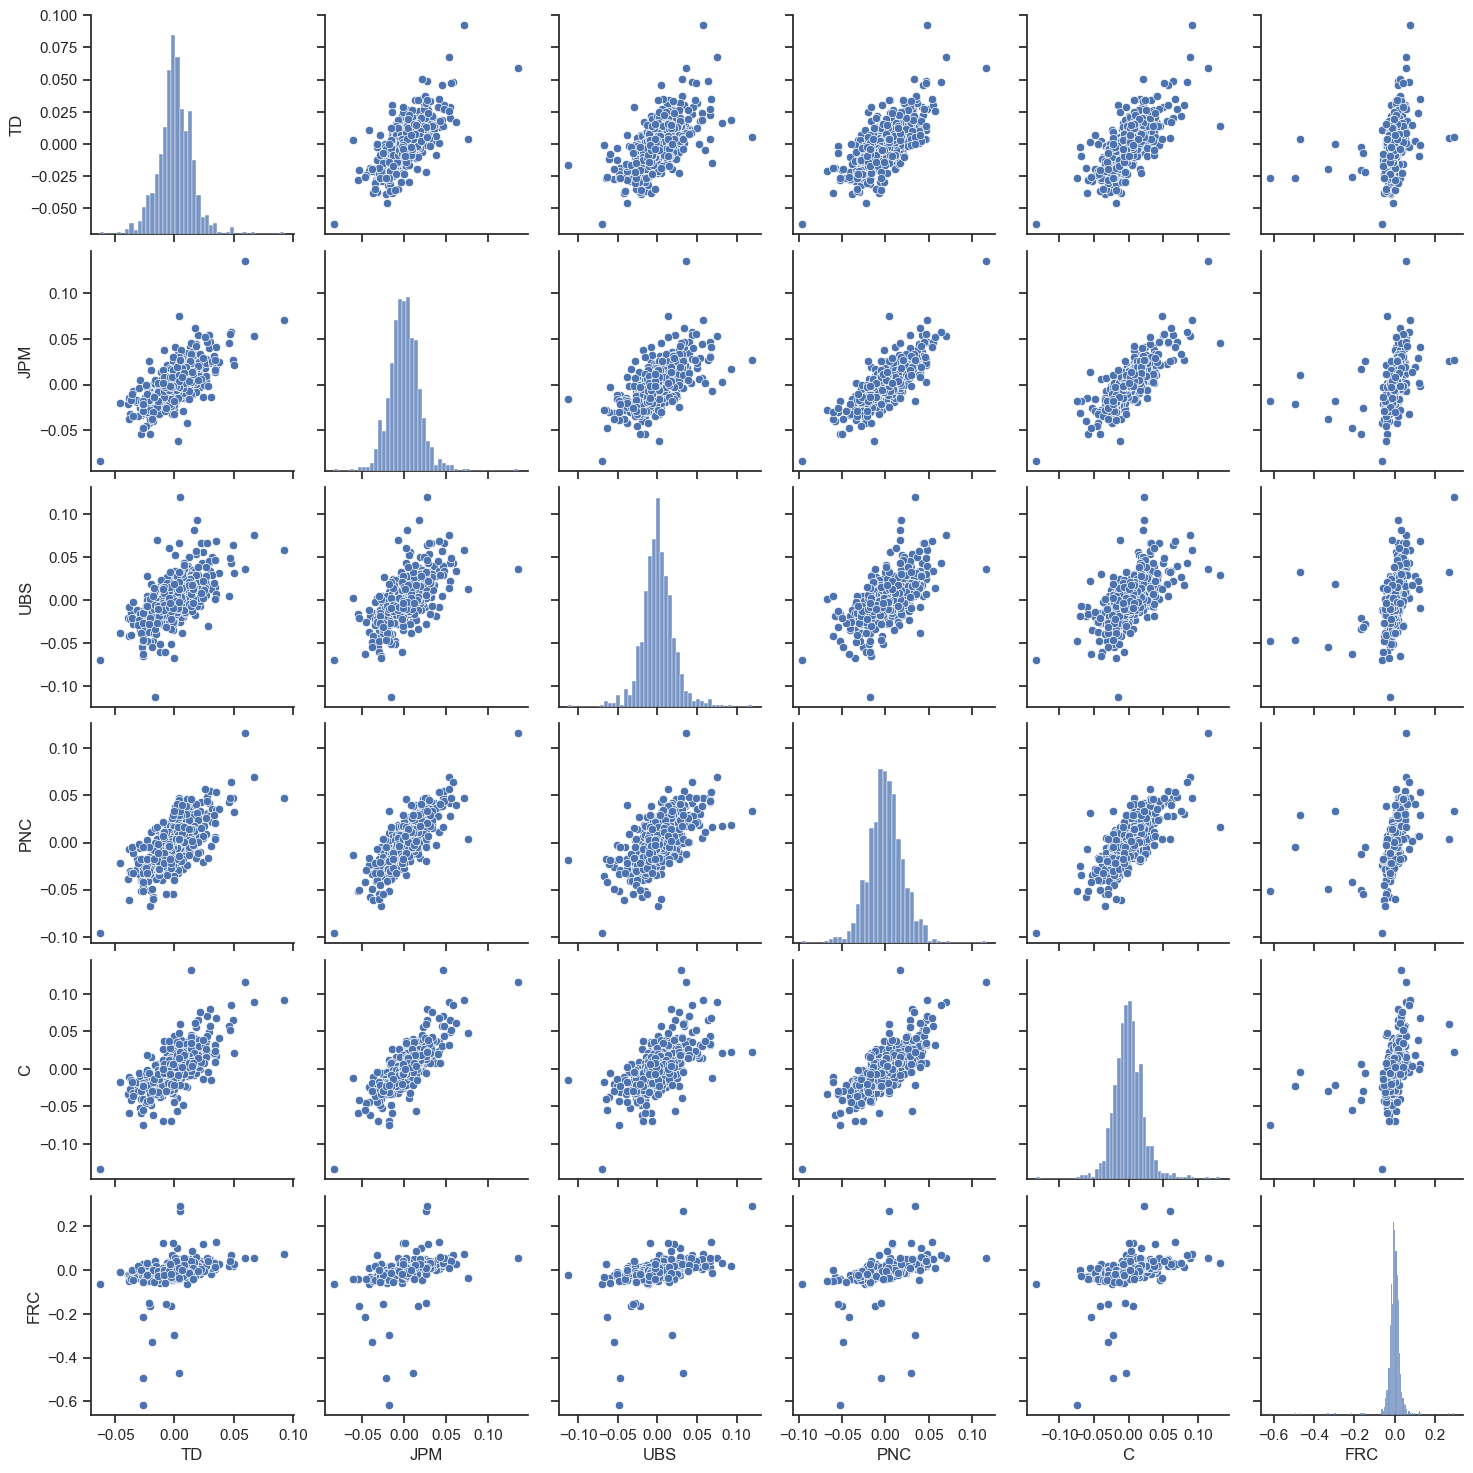

In [87]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot):
    for j in range (nplot):
        ax.axes[i,j].locator_params(axis='x',nbins=6,tight=True)

<Axes: >

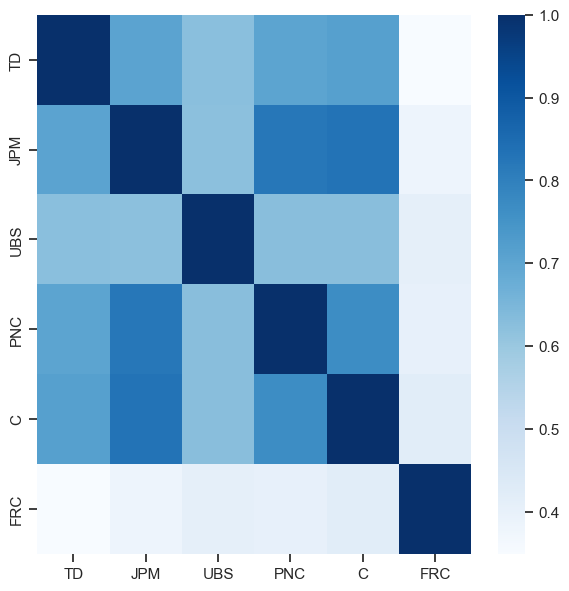

In [88]:
plt.figure(figsize=(7,7))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Blues")

In [89]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

TD   TD     1.000000
JPM  JPM    1.000000
C    C      1.000000
PNC  PNC    1.000000
UBS  UBS    1.000000
FRC  FRC    1.000000
JPM  C      0.831621
C    JPM    0.831621
JPM  PNC    0.820387
PNC  JPM    0.820387
C    PNC    0.767802
PNC  C      0.767802
C    TD     0.716003
TD   C      0.716003
JPM  TD     0.706333
TD   JPM    0.706333
     PNC    0.703308
PNC  TD     0.703308
UBS  C      0.628048
C    UBS    0.628048
PNC  UBS    0.627766
UBS  PNC    0.627766
     TD     0.625264
TD   UBS    0.625264
UBS  JPM    0.622230
JPM  UBS    0.622230
C    FRC    0.421186
FRC  C      0.421186
     UBS    0.409575
UBS  FRC    0.409575
PNC  FRC    0.402616
FRC  PNC    0.402616
JPM  FRC    0.384642
FRC  JPM    0.384642
TD   FRC    0.349171
FRC  TD     0.349171
dtype: float64

In [90]:
#Normalized Corr
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

TD   TD     1.000000
JPM  JPM    1.000000
C    C      1.000000
PNC  PNC    1.000000
UBS  UBS    1.000000
FRC  FRC    1.000000
JPM  C      0.831621
C    JPM    0.831621
JPM  PNC    0.820387
PNC  JPM    0.820387
C    PNC    0.767802
PNC  C      0.767802
C    TD     0.716003
TD   C      0.716003
JPM  TD     0.706333
TD   JPM    0.706333
     PNC    0.703308
PNC  TD     0.703308
UBS  C      0.628048
C    UBS    0.628048
PNC  UBS    0.627766
UBS  PNC    0.627766
     TD     0.625264
TD   UBS    0.625264
UBS  JPM    0.622230
JPM  UBS    0.622230
C    FRC    0.421186
FRC  C      0.421186
     UBS    0.409575
UBS  FRC    0.409575
PNC  FRC    0.402616
FRC  PNC    0.402616
JPM  FRC    0.384642
FRC  JPM    0.384642
TD   FRC    0.349171
FRC  TD     0.349171
dtype: float64

In [91]:
Normalized_Value.corr()

,TD,JPM,UBS,PNC,C,FRC
TD,1.000000,0.706333,0.625264,0.703308,0.716003,0.349171
JPM,0.706333,1.000000,0.622230,0.820387,0.831621,0.384642
UBS,0.625264,0.622230,1.000000,0.627766,0.628048,0.409575
PNC,0.703308,0.820387,0.627766,1.000000,0.767802,0.402616
C,0.716003,0.831621,0.628048,0.767802,1.000000,0.421186
FRC,0.349171,0.384642,0.409575,0.402616,0.421186,1.000000


<Axes: >

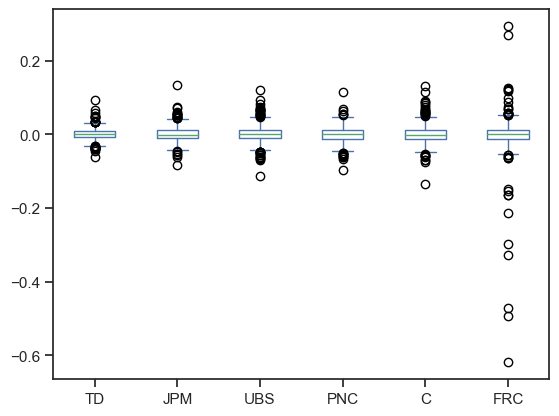

In [92]:
# Box plot
stock_rets.plot(kind='box')

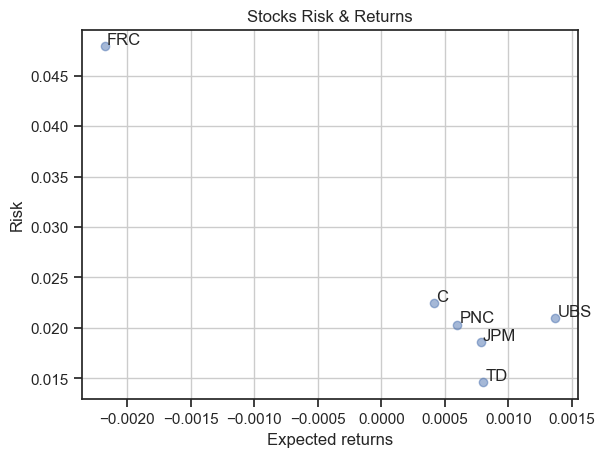

In [93]:
rets = stock_rets.dropna()

plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label,
                 xy=(x,y), xycoords='data',
                 xytext=(1.5,1.5), textcoords='offset points')

In [94]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,TD,JPM,UBS,PNC,C,FRC
Date,,,,,,
2020-04-28,0.559727,0.413662,0.726907,0.475301,0.555147,0.682928
2020-04-29,0.721209,0.504550,0.759855,0.675466,0.745516,0.695627
2020-04-30,0.153806,0.283246,0.394749,0.269345,0.375529,0.651134
2020-05-01,0.216381,0.261529,0.336816,0.289326,0.304750,0.638317
2020-05-04,0.436722,0.326911,0.389546,0.390643,0.469640,0.659862


In [95]:
Normalized_Value.corr()

,TD,JPM,UBS,PNC,C,FRC
TD,1.000000,0.706333,0.625264,0.703307,0.716002,0.349171
JPM,0.706333,1.000000,0.622230,0.820387,0.831621,0.384642
UBS,0.625264,0.622230,1.000000,0.627766,0.628048,0.409575
PNC,0.703307,0.820387,0.627766,1.000000,0.767802,0.402616
C,0.716002,0.831621,0.628048,0.767802,1.000000,0.421186
FRC,0.349171,0.384642,0.409575,0.402616,0.421186,1.000000


In [96]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
TD     0.000804
JPM    0.000780
UBS    0.001370
PNC    0.000597
C      0.000412
FRC   -0.002176
dtype: float64
--------------------------------------------------
Stock risks:
TD     0.014595
JPM    0.018584
UBS    0.020987
PNC    0.020319
C      0.022438
FRC    0.047919
dtype: float64


In [97]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
FRC,-0.002176,0.047919
C,0.000412,0.022438
PNC,0.000597,0.020319
JPM,0.000780,0.018584
TD,0.000804,0.014595
UBS,0.001370,0.020987


In [98]:
table.sort_values(by='Risk')

,Returns,Risk
TD,0.000804,0.014595
JPM,0.000780,0.018584
PNC,0.000597,0.020319
UBS,0.001370,0.020987
C,0.000412,0.022438
FRC,-0.002176,0.047919


In [99]:
rf = 0.01
table['Sharpe_Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe_Ratio
TD,0.000804,0.014595,-0.630087
JPM,0.000780,0.018584,-0.496107
UBS,0.001370,0.020987,-0.411221
PNC,0.000597,0.020319,-0.462753
C,0.000412,0.022438,-0.427314
FRC,-0.002176,0.047919,-0.254105


In [100]:
# Calc mean returns
meanDailyReturns = stock_rets.mean()
print(meanDailyReturns)

TD     0.000804
JPM    0.000780
UBS    0.001370
PNC    0.000597
C      0.000412
FRC   -0.002176
dtype: float64


In [101]:
# calc std returns
stdDailyReturns = stock_rets.std()
print(stdDailyReturns)

TD     0.014595
JPM    0.018584
UBS    0.020987
PNC    0.020319
C      0.022438
FRC    0.047919
dtype: float64


In [102]:
# calc covairance matric on daily returns
cov_matrix = (stock_rets.cov())*756
print(cov_matrix)

           TD       JPM       UBS       PNC         C       FRC
TD   0.161044  0.144836  0.144791  0.157679  0.177272  0.184619
JPM  0.144836  0.261091  0.183465  0.234191  0.262164  0.258952
UBS  0.144791  0.183465  0.332976  0.202376  0.223590  0.311392
PNC  0.157679  0.234191  0.202376  0.312112  0.264641  0.296356
C    0.177272  0.262164  0.223590  0.264641  0.380631  0.342368
FRC  0.184619  0.258952  0.311392  0.296356  0.342368  1.735936


In [103]:
# portfolio weights https://github.com/LastAncientOne/Stock_Analysis_For_Quant/blob/master/Python_Stock/Portfolio_Analysis.ipynb
weights = np.array([0.16,0.16,0.16,0.16,0.16,0.16])

In [104]:
portReturn = np.sum(meanDailyReturns*weights)
print(portReturn)

0.0002858880986211002


In [105]:
print(stock_rets)

                  TD       JPM       UBS       PNC         C       FRC
Date                                                                  
2020-04-28  0.024239  0.007081  0.056237  0.004740  0.013960  0.005253
2020-04-29  0.049264  0.026970  0.063892  0.047174  0.064605  0.016847
2020-04-30 -0.038665 -0.021459 -0.020928 -0.038922 -0.033824 -0.023776
2020-05-01 -0.028968 -0.026211 -0.034387 -0.034687 -0.052653 -0.035478
2020-05-04  0.005177 -0.011904 -0.022137 -0.013208 -0.008787 -0.015807
...              ...       ...       ...       ...       ...       ...
2023-04-21 -0.004035 -0.001918 -0.003438 -0.017675 -0.007490  0.027378
2023-04-24 -0.009561  0.001352  0.013307  0.007213  0.000000  0.122020
2023-04-25 -0.026342 -0.021744 -0.046693 -0.004587 -0.023047 -0.493750
2023-04-26  0.000000 -0.017724  0.018367  0.033549 -0.021712 -0.297531
2023-04-27  0.014956  0.013459  0.017535  0.001330  0.003628  0.087873

[756 rows x 6 columns]


In [106]:
stock_rets['Portfolio']=stock_rets.dot(weights)

In [107]:
stock_rets.head()

,TD,JPM,UBS,PNC,C,FRC,Portfolio
Date,,,,,,,
2020-04-28,0.024239,0.007081,0.056237,0.004740,0.013960,0.005253,0.017842
2020-04-29,0.049264,0.026970,0.063892,0.047174,0.064605,0.016847,0.043000
2020-04-30,-0.038665,-0.021459,-0.020928,-0.038922,-0.033824,-0.023776,-0.028412
2020-05-01,-0.028968,-0.026211,-0.034387,-0.034687,-0.052653,-0.035478,-0.033981
2020-05-04,0.005177,-0.011904,-0.022137,-0.013208,-0.008787,-0.015807,-0.010666


In [108]:
# calc cumulative returns
daily_cum_ret = (1+stock_rets).cumprod()
print(daily_cum_ret.tail())

                  TD       JPM       UBS       PNC         C       FRC  \
Date                                                                     
2023-04-21  1.731188  1.625168  2.383204  1.295682  1.178153  0.138805   
2023-04-24  1.714636  1.627365  2.414918  1.305029  1.178153  0.155742   
2023-04-25  1.669470  1.591980  2.302159  1.299043  1.151000  0.078844   
2023-04-26  1.669470  1.563765  2.344443  1.342624  1.126010  0.055386   
2023-04-27  1.694437  1.584811  2.385553  1.344409  1.130095  0.060253   

            Portfolio  
Date                   
2023-04-21   1.215245  
2023-04-24   1.241364  
2023-04-25   1.118983  
2023-04-26   1.067948  
2023-04-27   1.091662  


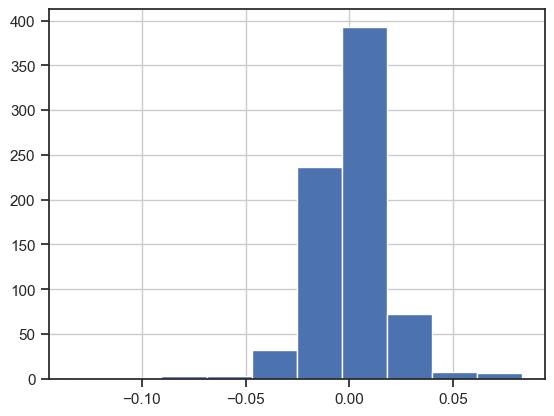

In [109]:
stock_rets['Portfolio'].hist()
plt.show()

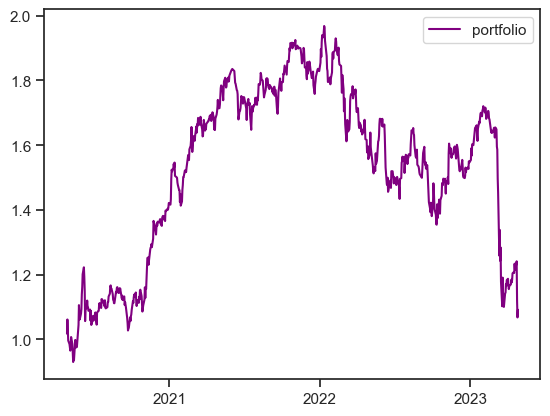

In [110]:
import matplotlib.dates

# Plot the portfolio cumulative returns only
fig, ax = plt.subplots()
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio, color='purple', label="portfolio")
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.legend()
plt.show()

In [111]:
# Print the mean
print("mean : ", stock_rets['Portfolio'].mean()*100)

# Print the standard deviation
print("Std. dev: ", stock_rets['Portfolio'].std()*100)

# Print the skewness
print("skew: ", stock_rets['Portfolio'].skew())

# Print the kurtosis
print("kurt: ", stock_rets['Portfolio'].kurtosis())

mean :  0.028588809862110025
Std. dev:  1.8365990480474552
skew:  -0.5860236297061182
kurt:  7.108064253852073


In [112]:
# Calculate the standard deviation by taking the square root
port_standard_dev = np.sqrt(np.dot(weights.T, np.dot(weights, cov_matrix)))

# Print the results 
print(str(np.round(port_standard_dev, 4) * 100) + '%')

50.5%


In [113]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# Print the result
print(str(np.round(port_variance, 4) * 100) + '%')

25.5%


In [115]:
# Calculate total return and annualized return from price data 
total_return = (stock_rets['Portfolio'][-1] - stock_rets['Portfolio'][0]) / stock_rets['Portfolio'][0]

# Annualize the total return over 6 year 
annualized_return = ((total_return + 1)**(1/6))-1

In [120]:
# Calculate annualized volatility from the standard deviation
vol_port = stock_rets['Portfolio'].std() * np.sqrt(756)

In [121]:
# Calculate the Sharpe ratio 
rf = 0.01
sharpe_ratio = ((annualized_return - rf) / vol_port)
print (sharpe_ratio)

0.05373576576224628


If the analysis results in a negative Sharpe ratio, it either means the risk-free rate is greater than the portfolio's return, or the portfolio's return is expected to be negative.

In [123]:
# Create a downside return column with the negative returns only
target = 0
downside_returns = stock_rets.loc[stock_rets['Portfolio'] < target]

# Calculate expected return and std dev of downside
expected_return = stock_rets['Portfolio'].mean()
down_stdev = downside_returns.std()

# Calculate the sortino ratio
rf = 0.01
sortino_ratio = (expected_return - rf)/down_stdev

# Print the results
print("Expected return: ", expected_return*100)
print('-' * 50)
print("Downside risk:")
print(down_stdev*100)
print('-' * 50)
print("Sortino ratio:")
print(sortino_ratio)

Expected return:  0.028588809862110025
--------------------------------------------------
Downside risk:
TD           1.105087
JPM          1.247840
UBS          1.607418
PNC          1.466654
C            1.493310
FRC          5.602385
Portfolio    1.390882
dtype: float64
--------------------------------------------------
Sortino ratio:
TD          -0.879036
JPM         -0.778474
UBS         -0.604330
PNC         -0.662331
C           -0.650509
FRC         -0.173392
Portfolio   -0.698414
dtype: float64


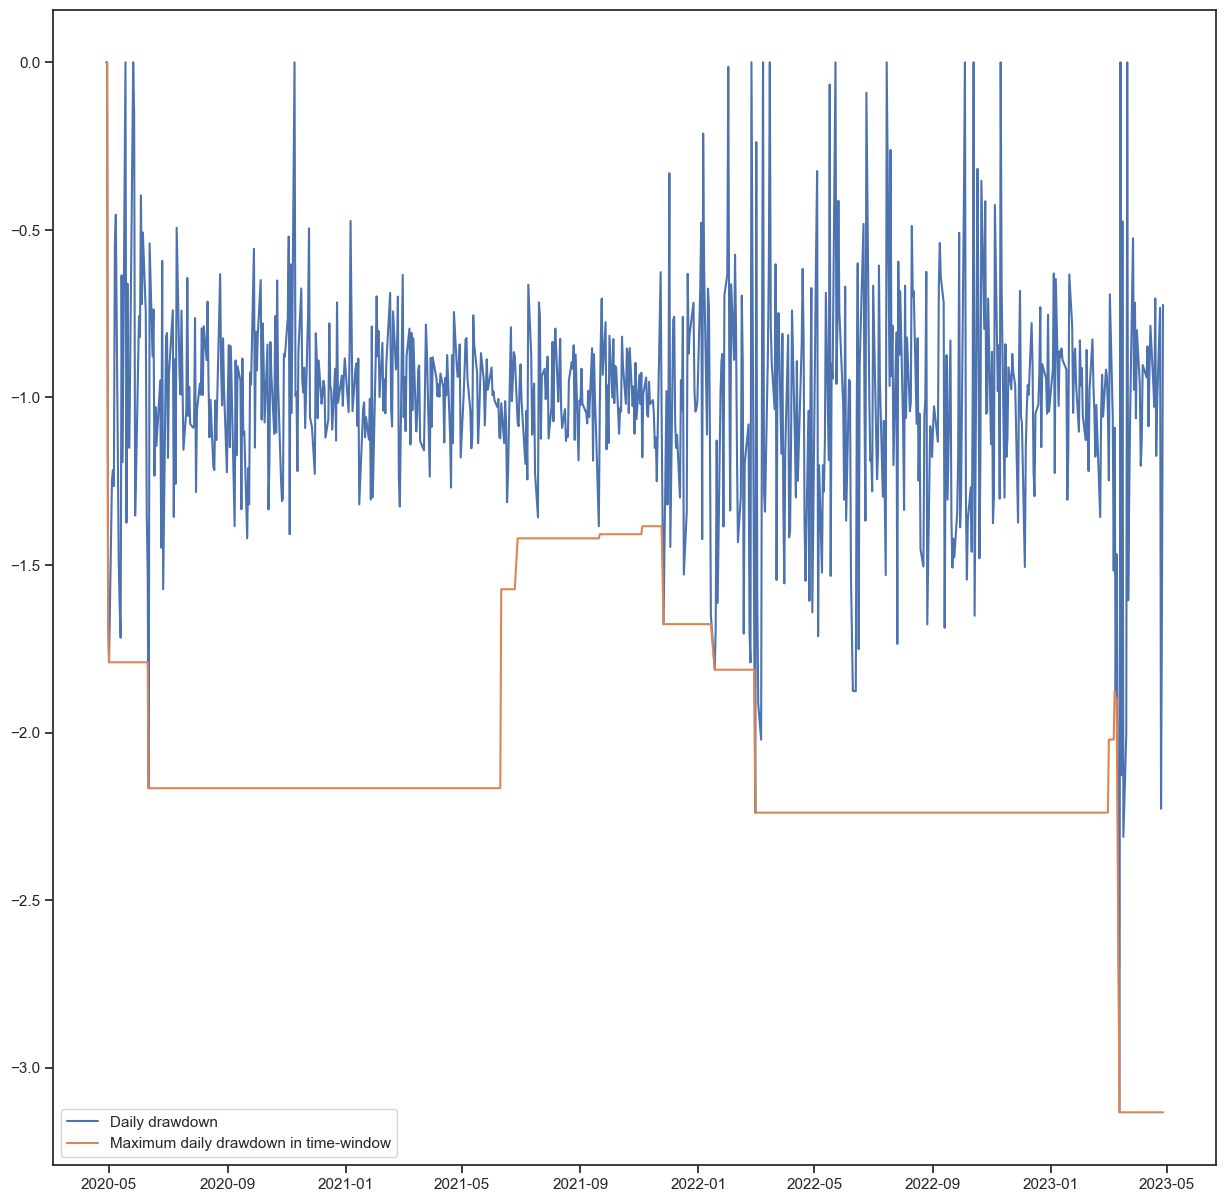

In [126]:
# Calculate the max value 
roll_max = stock_rets['Portfolio'].rolling(center=False,min_periods=1,window=252).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = stock_rets['Portfolio']/roll_max - 1.0

# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=252).min()

# Plot the results
plt.figure(figsize=(15,15))
plt.plot(stock_rets.index, daily_draw_down, label='Daily drawdown')
plt.plot(stock_rets.index, max_daily_draw_down, label='Maximum daily drawdown in time-window')
plt.legend()
plt.show()

In [37]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px

today = date.today()

stock = input('Enter ticker symbol: ')
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download(stock, 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", 
             "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.head())

Enter ticker symbol:  frc


        Date        Open        High         Low       Close   Adj Close  \
0 2022-04-28  152.929993  154.550003  149.649994  153.669998  152.746277   
1 2022-04-29  152.110001  153.839996  148.910004  149.220001  148.323044   
2 2022-05-02  149.750000  152.509995  147.949997  152.339996  151.424271   
3 2022-05-03  153.740005  154.869995  152.449997  153.550003  152.627014   
4 2022-05-04  153.520004  156.720001  150.490005  156.500000  155.559296   

    Volume  
0   859200  
1  1404000  
2  1028800  
3  1257700  
4   905800  


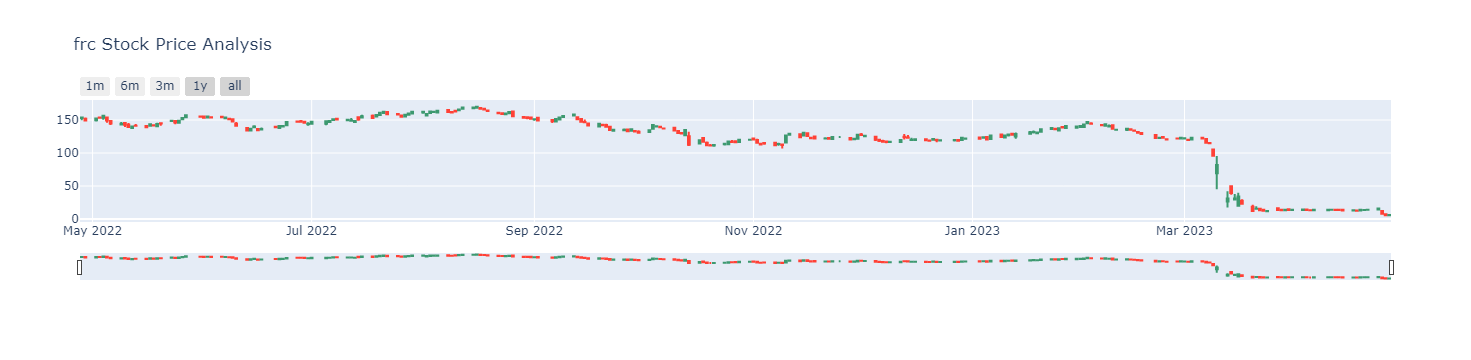

In [42]:
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], high=data["High"],
                                        low=data["Low"], close=data["Close"])])
figure.update_layout(title = f'{stock} Stock Price Analysis', xaxis_rangeslider_visible=True)
figure.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
figure.show()

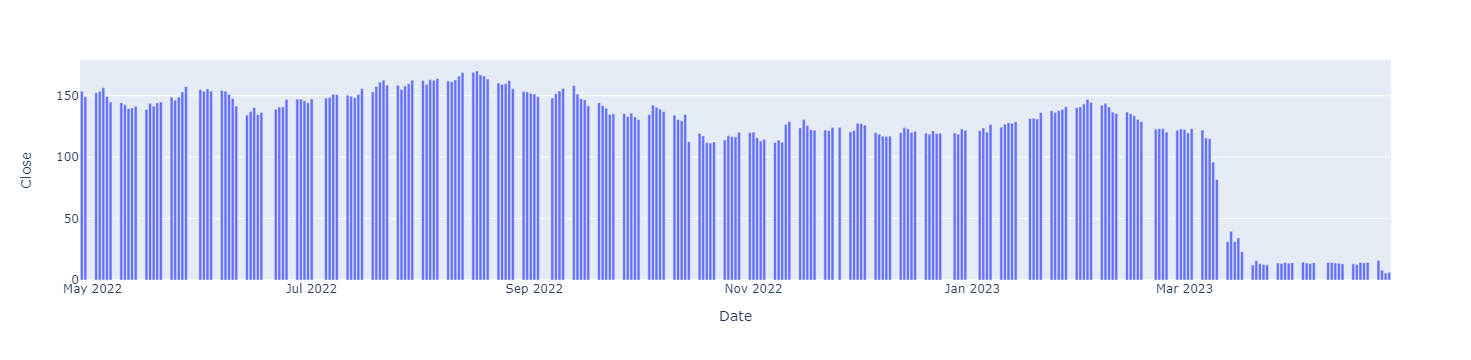

In [40]:
figure = px.bar(data, x = "Date", y= "Close")
figure.show()